In [200]:
# FINAL PROJECT

# Import necessary libraries

import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [201]:
# CLEANING FLAT FILE DATA

# Reading in the NBA csv file.

nba_data2 = pd.read_csv("nba.games.stats2.csv")
nba_data2.head(10)

# CONDUCTING CSV TRANSFORMATIONS

# TRANSFORMATION 1
# Renaming the first column, which is an identifier from a blank columm shown as "Unnamed:0" above to "ID".

nba_data2.columns.values[0] = 'ID'
nba_data2.head(10)

# TRANSFORMATION 2
# Merging team name and mascot columns from another file.

# Reading in the team names file.
team_names = pd.read_csv("nba_team_names.csv")
team_names.head(10)

# TRANSFORMATION 2 CONTINUED

# Merging the nba dataset with the team names.
nba2 = pd.merge(nba_data2,team_names)
print(nba2)

# TRANSFORMATION 3
# Merging opponent name and opponent mascot columns from another file.

# Reading in the opponent team name file.
opponent_names = pd.read_csv("opponent_team_names.csv")
opponent_names.head(10)


# TRANSFORMATION 3 CONTINUED

# Merging the nba dataset with the opponent team names.
nba = pd.merge(nba2,opponent_names)
print(nba)

# TRANSFORMATION 4
# Reorder the list of columns to move 'Team Name', 'Mascot', 'Opponent Name', and 'Opponent Mascot' towards the front of the
# data to align with the 'Team' and 'Opponent' columns.

# Getting a list of column names to easily rearrange.
cols = list(nba.columns.values)
print(cols)

# TRANSFORMATION 4 CONTINUED

# Rearranged the columns.
nba = nba[['ID', 'Team',  'Team Name', 'Mascot', 'Game', 'Date', 'Home', 'Opponent', 'Opponent Name', 'Opponent Mascot', 'WINorLOSS', 'TeamPoints', 'OpponentPoints', 'FieldGoals', 'FieldGoalsAttempted', 'FieldGoals.', 'X3PointShots', 'X3PointShotsAttempted', 'X3PointShots.', 'FreeThrows', 'FreeThrowsAttempted', 'FreeThrows.', 'OffRebounds', 'TotalRebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers', 'TotalFouls', 'Opp.FieldGoals', 'Opp.FieldGoalsAttempted', 'Opp.FieldGoals.', 'Opp.3PointShots', 'Opp.3PointShotsAttempted', 'Opp.3PointShots.', 'Opp.FreeThrows', 'Opp.FreeThrowsAttempted', 'Opp.FreeThrows.', 'Opp.OffRebounds', 'Opp.TotalRebounds', 'Opp.Assists', 'Opp.Steals', 'Opp.Blocks', 'Opp.Turnovers', 'Opp.TotalFouls']]
print(nba)

# Transformation 5
# Check for duplicates in ID column.
# Every row should have a unique ID, so there should be no duplicates. If there are, I must remove them.

print("Are there any duplicates in the ID column? - {}".format(any(nba.ID.duplicated())))
# There are no duplicates in the ID column, which is good.
# Nothing needs to be removed in this regard.

# TRANSFORMATION 6
# Check for NaN in ID, Team, and Opponent columns.
# These 3 columns are vital/essential and therefore must make sure there are no NaN values.

print("Does the ID column contain NaN? - %r" % nba.ID.isnull().values.any())
print("Does the Team column contain NaN? - %r" % nba.Team.isnull().values.any())
print("Does the Opponent column contain NaN? - %r" % nba.Opponent.isnull().values.any())
# The ID, Team, and Opponent columns do not contain any NaNs, which is good since they are essential.
# Nothing needs to be removed in this regard.

          ID Team  Game        Date  Home Opponent WINorLOSS  TeamPoints  \
0     1198.0  ATL   1.0  10/27/2016  Home      WAS         W       114.0   
1     2198.0  ATL   2.0  10/29/2016  Away      PHI         W       104.0   
2     3198.0  ATL   3.0  10/31/2016  Home      SAC         W       106.0   
3     4198.0  ATL   4.0   11/2/2016  Home      LAL         L       116.0   
4     5198.0  ATL   5.0   11/4/2016  Away      WAS         L        92.0   
...      ...  ...   ...         ...   ...      ...       ...         ...   
2455  7889.0  WAS  78.0    4/4/2017  Home      CHO         W       118.0   
2456  7989.0  WAS  79.0    4/6/2017  Away      NYK         W       106.0   
2457  8089.0  WAS  80.0    4/8/2017  Home      MIA         L       103.0   
2458  8190.0  WAS  81.0   4/10/2017  Away      DET         W       105.0   
2459  8289.0  WAS  82.0   4/12/2017  Away      MIA         L       102.0   

      OpponentPoints  FieldGoals  ...  Opp.FreeThrows.  Opp.OffRebounds  \
0           

In [202]:
# CLEANSING WEBSITE DATA

url = "http://www.espn.com/nba/attendance/_/year/2017"
response = requests.get(url)

def status_check(r):
    if r.status_code==200:
        print("Success!")
        return 1
    else:
        print("Failed")
        return -1

status_check(response)

html = response.content
nba_list = pd.read_html(html)
nba_list = nba_list[-1]
nba_df = pd.DataFrame(nba_list)
nba_df.columns = nba_df.iloc[1]
nba_df = nba_df.iloc[2:]
print(nba_df)

# Transformation #1
# Identify and change column headers to clearly distinguish them.

nba_df.columns

# Changing names to specify home, away, and total.

nba_df.columns = ['Rank', 'Mascot', 'Home Games', 'Total Home Fans', 'Home Avg Fans',
       'Home % Capacity', 'Away Games', 'Away Avg Fans', 'Away % Capacity',
       'Total Games', 'Total Avg Fans', 'Total % Capacity']

nba_df

# Transformation #2
# Remove East and West rows from the dataset as they are not an individual team and therefore not needed.

nba_df = nba_df[:-2]
nba_df

# Transformation #3
# Change 'NY Knicks' to just "Knicks", as I just want the mascot included.

nba_df['Mascot'] = nba_df['Mascot'].replace('NY Knicks','Knicks')
print(nba_df)

# Transformation #4
# Add City/Team Name to the data.

team_names = pd.read_csv("nba_team_names.csv")
team_names

# Transformation #4 CONTINUED

nba_df1 = pd.merge(nba_df, team_names)
nba_df1

# Transformation #5
# Reorder the list of columns to move Team, Team Name, Total Games, Total Avg Fans, and Total % Capacity to the front.

print(nba_df1.columns)

# Transformation #5 CONTINUED

nba_df1 = nba_df1[['Rank', 'Team', 'Team Name', 'Mascot', 'Total Games', 'Total Avg Fans', 'Total % Capacity', 'Home Games',
                   'Total Home Fans', 'Home Avg Fans', 'Home % Capacity', 'Away Games', 'Away Avg Fans', 'Away % Capacity',]]
print(nba_df1)

Success!
1    RK           TEAM GMS   TOTAL    AVG    PCT GMS    AVG    PCT GMS    AVG  \
2     1          Bulls  41  888882  21680  103.6  41  18033   94.0  82  19856   
3     2      Cavaliers  41  843042  20562  100.0  41  19021   98.7  82  19791   
4     3        Raptors  41  813050  19830  100.2  41  17925   92.8  82  18878   
5     4      Mavericks  41  811366  19789  103.1  41  17519   91.9  82  18654   
6     5      NY Knicks  41  810741  19774   99.8  41  17927   94.6  82  18850   
7     6           Jazz  41  806605  19673   98.8  41  17212   90.5  82  18442   
8     7           Heat  41  805400  19643  100.2  41  17818   92.4  82  18731   
9     8       Warriors  41  803436  19596  100.0  41  19015  100.3  82  19305   
10    9  Trail Blazers  41  792029  19317   99.4  41  17555   92.2  82  18436   
11   10       Clippers  41  782609  19088  100.1  41  17889   94.1  82  18488   
12   11         Lakers  41  776917  18949   99.4  41  18191   95.6  82  18570   
13   12        Celt

In [203]:
# Final Project API Cleaning/Formatting


# Importing libraries and connecting to the API

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import urllib.parse
import urllib.error
import json
import requests



url = "https://free-nba.p.rapidapi.com/teams"

querystring = {"page":"0"}

headers = {
    'x-rapidapi-host': "free-nba.p.rapidapi.com",
    'x-rapidapi-key': "4321f02408msh314efc88c91d98ep105774jsnf56ee3a9ca35"
    }

response = requests.request("GET", url, headers=headers, params=querystring)

# Print results to verify the connection was a success

print(response)
print(response.text)

# Seeing which keys are available
x = response.json()
x.keys()

# Putting the api into a dataframe
api_df = pd.DataFrame(x['data'])
print(api_df)


# TRANSFORMATION #1

# Merging the api data with a NBA team arena dataset.
arenas = pd.read_csv("NBA_Arenas.csv")

api_df1 = pd.merge(api_df,arenas, on = "name", how='left')
print(api_df1)

# The data was successfully merged.


# TRANSFORMATION 2

# Remove the 'id' column as the IDs in the Excel NBA data refer to individual games and not teams. This is to avoid any
# confusion or potential problems later on. Also removing 'full name' as it will not be needed, at least at this time.

api_df1 = api_df1.drop(['id', 'full_name', 'city_x'], axis = 1)
api_df1.columns

# The 'id', 'full_name', and 'city_x' columns have now been removed.


# TRANSFORMATION 3

# Change column headers to align with column names from Excel and Website data.
# Changing 'abbreviation' to 'Team'
# Changing 'city_y' to 'Team Name'
# Changing 'conference' to 'Conference'
# Changing 'division' to 'Division'
# Changing 'name' to 'Mascot'
# Changing 'Opened' to 'Year Opened'

api_df1.columns = ['Team', 'Conference', 'Division', 'Mascot', 'Team Name', 'Arena', 'Year Opened', 'Capacity']
api_df1.columns

# The columns were successfully renamed.


# TRANSFORMATION 4

# Rearrange the column order to view easier.

api_df1.columns = ['Team', 'Team Name', 'Mascot', 'Conference', 'Division', 'Arena', 'Year Opened', 'Capacity']
api_df1.columns

# The columns were successfully reorganized.


# TRANSFORMATION 5

# Change 'Team' abbreviations for teams so they sync up with the Excel dataset.
# Change 'BKN' to 'BRK'
# Change 'CHA' to 'CHO'
# Change 'PHX' to 'PHO'

api_df1['Team'] = api_df1['Team'].replace('BKN', 'BRK').replace('CHA', 'CHO').replace('PHX', 'PHO')
print(api_df1)

# The team abbreviations were successfully changed.


# Transformation 6

# Check for duplicates in the 'Team' column.
# Every row should have a unique 'Team', so there should be no duplicates. If there are, I must remove them.
# I will also, check for duplicates in the 'Arena' column.

print("Are there any duplicates in the Team column? - {}".format(any(api_df1.Team.duplicated())))
print("Are there any duplicates in the Arena column - {}".format(any(api_df1.Arena.duplicated())))
# There are no duplicates in the Team column, which is good.
# There is a duplicate in the Arena column. After further inspection, the Los Angeles Clippers and Los Angeles Lakers both play
# in the Staples Center, so this is acceptable.
# Nothing needs to be removed in this regard.

<Response [200]>
{"data":[{"id":1,"abbreviation":"ATL","city":"Atlanta","conference":"East","division":"Southeast","full_name":"Atlanta Hawks","name":"Hawks"},{"id":2,"abbreviation":"BOS","city":"Boston","conference":"East","division":"Atlantic","full_name":"Boston Celtics","name":"Celtics"},{"id":3,"abbreviation":"BKN","city":"Brooklyn","conference":"East","division":"Atlantic","full_name":"Brooklyn Nets","name":"Nets"},{"id":4,"abbreviation":"CHA","city":"Charlotte","conference":"East","division":"Southeast","full_name":"Charlotte Hornets","name":"Hornets"},{"id":5,"abbreviation":"CHI","city":"Chicago","conference":"East","division":"Central","full_name":"Chicago Bulls","name":"Bulls"},{"id":6,"abbreviation":"CLE","city":"Cleveland","conference":"East","division":"Central","full_name":"Cleveland Cavaliers","name":"Cavaliers"},{"id":7,"abbreviation":"DAL","city":"Dallas","conference":"West","division":"Southwest","full_name":"Dallas Mavericks","name":"Mavericks"},{"id":8,"abbreviation

In [204]:
# Changing data sources to dataframes

df_csv = pd.DataFrame(nba)
df_web = pd.DataFrame(nba_df1)
df_api = pd.DataFrame(api_df1)

In [205]:
# COMBINING DATA FROM ALL 3 SOURCES

# Excel flat file final data is 'nba'
# Website final data is 'nba_df1'
# API final data is 'api_df1'

nba_comb = pd.merge(df_csv,df_web,on = "Team", how = "left")
nba_comb

,ID,Team,Team Name_x,Mascot_x,Game,Date,Home,Opponent,Opponent Name,Opponent Mascot,...,Total Games,Total Avg Fans,Total % Capacity,Home Games,Total Home Fans,Home Avg Fans,Home % Capacity,Away Games,Away Avg Fans,Away % Capacity
0,1198.0,ATL,Atlanta,Hawks,1.0,10/27/2016,Home,WAS,Washington,Wizards,...,82,16887,89.5,41,654306,15958,85.2,41,17816,93.7
1,5198.0,ATL,Atlanta,Hawks,5.0,11/4/2016,Away,WAS,Washington,Wizards,...,82,16887,89.5,41,654306,15958,85.2,41,17816,93.7
2,4760.0,ATL,Atlanta,Hawks,47.0,1/27/2017,Home,WAS,Washington,Wizards,...,82,16887,89.5,41,654306,15958,85.2,41,17816,93.7
3,7199.0,ATL,Atlanta,Hawks,71.0,3/22/2017,Away,WAS,Washington,Wizards,...,82,16887,89.5,41,654306,15958,85.2,41,17816,93.7
4,7200.0,BOS,Boston,Celtics,7.0,11/9/2016,Away,WAS,Washington,Wizards,...,82,18433,97.1,41,760690,18553,99.6,41,18313,94.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,52104.0,UTA,Utah,Jazz,52.0,2/6/2017,Away,ATL,Atlanta,Hawks,...,82,18442,94.7,41,806605,19673,98.8,41,17212,90.5
2456,1304.0,WAS,Washington,Wizards,1.0,10/27/2016,Away,ATL,Atlanta,Hawks,...,82,17476,88.5,41,697107,17002,83.8,41,17949,93.5
2457,4304.0,WAS,Washington,Wizards,4.0,11/4/2016,Home,ATL,Atlanta,Hawks,...,82,17476,88.5,41,697107,17002,83.8,41,17949,93.5
2458,4689.0,WAS,Washington,Wizards,46.0,1/27/2017,Away,ATL,Atlanta,Hawks,...,82,17476,88.5,41,697107,17002,83.8,41,17949,93.5


In [206]:
nba_final = pd.merge(nba_comb,df_api,on = "Team", how = "left")
nba_final

,ID,Team,Team Name_x,Mascot_x,Game,Date,Home,Opponent,Opponent Name,Opponent Mascot,...,Away Games,Away Avg Fans,Away % Capacity,Team Name,Mascot,Conference,Division,Arena,Year Opened,Capacity
0,1198.0,ATL,Atlanta,Hawks,1.0,10/27/2016,Home,WAS,Washington,Wizards,...,41,17816,93.7,East,Southeast,Hawks,Atlanta,State Farm Arena,1999,"18,118"
1,5198.0,ATL,Atlanta,Hawks,5.0,11/4/2016,Away,WAS,Washington,Wizards,...,41,17816,93.7,East,Southeast,Hawks,Atlanta,State Farm Arena,1999,"18,118"
2,4760.0,ATL,Atlanta,Hawks,47.0,1/27/2017,Home,WAS,Washington,Wizards,...,41,17816,93.7,East,Southeast,Hawks,Atlanta,State Farm Arena,1999,"18,118"
3,7199.0,ATL,Atlanta,Hawks,71.0,3/22/2017,Away,WAS,Washington,Wizards,...,41,17816,93.7,East,Southeast,Hawks,Atlanta,State Farm Arena,1999,"18,118"
4,7200.0,BOS,Boston,Celtics,7.0,11/9/2016,Away,WAS,Washington,Wizards,...,41,18313,94.6,East,Atlantic,Celtics,Boston,TD Garden,1995,"18,624"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,52104.0,UTA,Utah,Jazz,52.0,2/6/2017,Away,ATL,Atlanta,Hawks,...,41,17212,90.5,West,Northwest,Jazz,Utah,Vivint Smart Home Arena,1991,"18,306"
2456,1304.0,WAS,Washington,Wizards,1.0,10/27/2016,Away,ATL,Atlanta,Hawks,...,41,17949,93.5,East,Southeast,Wizards,Washington,Capital One Arena,1997,"20,356"
2457,4304.0,WAS,Washington,Wizards,4.0,11/4/2016,Home,ATL,Atlanta,Hawks,...,41,17949,93.5,East,Southeast,Wizards,Washington,Capital One Arena,1997,"20,356"
2458,4689.0,WAS,Washington,Wizards,46.0,1/27/2017,Away,ATL,Atlanta,Hawks,...,41,17949,93.5,East,Southeast,Wizards,Washington,Capital One Arena,1997,"20,356"


In [207]:
# Checking shapes of the different final datasets to make sure things look correct

print(df_csv.shape)
print(df_web.shape)
print(df_api.shape)
print(nba_final.shape)

# Checking the column names

nba_final.columns

(2460, 45)
(30, 14)
(30, 8)
(2460, 65)


Index(['ID', 'Team', 'Team Name_x', 'Mascot_x', 'Game', 'Date', 'Home',
       'Opponent', 'Opponent Name', 'Opponent Mascot', 'WINorLOSS',
       'TeamPoints', 'OpponentPoints', 'FieldGoals', 'FieldGoalsAttempted',
       'FieldGoals.', 'X3PointShots', 'X3PointShotsAttempted', 'X3PointShots.',
       'FreeThrows', 'FreeThrowsAttempted', 'FreeThrows.', 'OffRebounds',
       'TotalRebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers',
       'TotalFouls', 'Opp.FieldGoals', 'Opp.FieldGoalsAttempted',
       'Opp.FieldGoals.', 'Opp.3PointShots', 'Opp.3PointShotsAttempted',
       'Opp.3PointShots.', 'Opp.FreeThrows', 'Opp.FreeThrowsAttempted',
       'Opp.FreeThrows.', 'Opp.OffRebounds', 'Opp.TotalRebounds',
       'Opp.Assists', 'Opp.Steals', 'Opp.Blocks', 'Opp.Turnovers',
       'Opp.TotalFouls', 'Rank', 'Team Name_y', 'Mascot_y', 'Total Games',
       'Total Avg Fans', 'Total % Capacity', 'Home Games', 'Total Home Fans',
       'Home Avg Fans', 'Home % Capacity', 'Away Games', 'Away Av

In [208]:
import sqlite3

from sqlalchemy import create_engine

In [209]:
engine = create_engine('sqlite:///nba_data.db, echo=True')
sqlite_connection = engine.connect()

In [210]:
nba_final.to_sql("nba_final",sqlite_connection,if_exists='replace')
pd.read_sql("SELECT * FROM nba_final",engine)

,index,ID,Team,Team Name_x,Mascot_x,Game,Date,Home,Opponent,Opponent Name,...,Away Games,Away Avg Fans,Away % Capacity,Team Name,Mascot,Conference,Division,Arena,Year Opened,Capacity
0,0,1198.0,ATL,Atlanta,Hawks,1.0,10/27/2016,Home,WAS,Washington,...,41,17816,93.7,East,Southeast,Hawks,Atlanta,State Farm Arena,1999,"18,118"
1,1,5198.0,ATL,Atlanta,Hawks,5.0,11/4/2016,Away,WAS,Washington,...,41,17816,93.7,East,Southeast,Hawks,Atlanta,State Farm Arena,1999,"18,118"
2,2,4760.0,ATL,Atlanta,Hawks,47.0,1/27/2017,Home,WAS,Washington,...,41,17816,93.7,East,Southeast,Hawks,Atlanta,State Farm Arena,1999,"18,118"
3,3,7199.0,ATL,Atlanta,Hawks,71.0,3/22/2017,Away,WAS,Washington,...,41,17816,93.7,East,Southeast,Hawks,Atlanta,State Farm Arena,1999,"18,118"
4,4,7200.0,BOS,Boston,Celtics,7.0,11/9/2016,Away,WAS,Washington,...,41,18313,94.6,East,Atlantic,Celtics,Boston,TD Garden,1995,"18,624"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,2455,52104.0,UTA,Utah,Jazz,52.0,2/6/2017,Away,ATL,Atlanta,...,41,17212,90.5,West,Northwest,Jazz,Utah,Vivint Smart Home Arena,1991,"18,306"
2456,2456,1304.0,WAS,Washington,Wizards,1.0,10/27/2016,Away,ATL,Atlanta,...,41,17949,93.5,East,Southeast,Wizards,Washington,Capital One Arena,1997,"20,356"
2457,2457,4304.0,WAS,Washington,Wizards,4.0,11/4/2016,Home,ATL,Atlanta,...,41,17949,93.5,East,Southeast,Wizards,Washington,Capital One Arena,1997,"20,356"
2458,2458,4689.0,WAS,Washington,Wizards,46.0,1/27/2017,Away,ATL,Atlanta,...,41,17949,93.5,East,Southeast,Wizards,Washington,Capital One Arena,1997,"20,356"


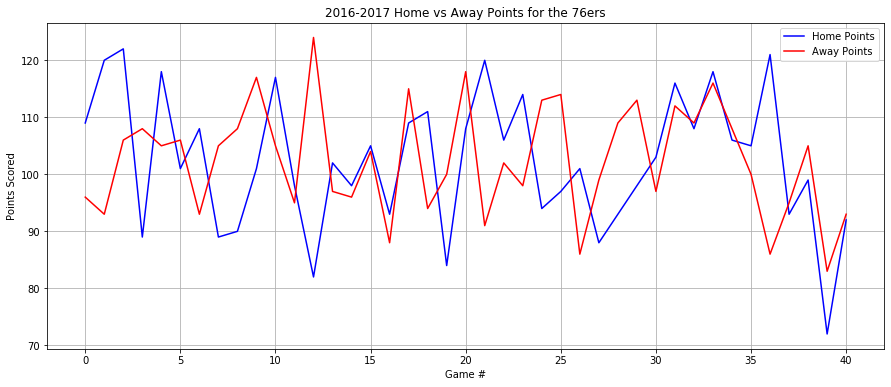

In [211]:
# VISUALIZATION 1 - Line Chart of 76ers point scored at home vs away

home_points = pd.read_sql("SELECT TeamPoints FROM nba_final where Mascot_x = '76ers' AND Home = 'Home' LIMIT 41",engine)
away_points = pd.read_sql("SELECT OpponentPoints FROM nba_final where Opponent = 'PHI' AND Home = 'Home' LIMIT 41", engine)

plt.plot(home_points, label = 'Home Points', color = 'blue')
plt.plot(away_points, label = 'Away Points', color = 'red')
plt.title("2016-2017 Home vs Away Points for the 76ers")
plt.grid()
plt.xlabel('Game #')
plt.ylabel('Points Scored')
plt.legend()

# It appears that the 76ers points scored were not impacted by the location of being home versus away.

   COUNT(WINorLOSS)
0                28
   COUNT(WINorLOSS)
0                17
   COUNT(WINorLOSS)
0                11


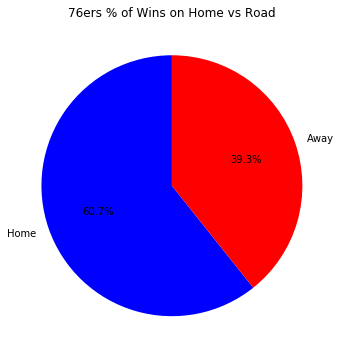

In [212]:
# VISUALIZATION 2 - 76ers % of Wins by Location

total_wins = pd.read_sql("SELECT COUNT(WINorLOSS) from nba_final where Team = 'PHI' and WINorLOSS = 'W'", engine)
home_wins = pd.read_sql("SELECT COUNT(WINorLOSS) from nba_final where Mascot_x = '76ers' AND Home = 'Home' AND WINorLOSS = 'W' ", engine)
away_wins = pd.read_sql("SELECT COUNT(WINorLOSS) from nba_final where Opponent = 'PHI' AND Home = 'Home' AND WINorLOSS = 'L'", engine)

print(total_wins)
print(home_wins)
print(away_wins)

phi_wins = [17, 11]
location = ['Home', 'Away']
colors = ['Blue', 'Red']

plt.pie(phi_wins, labels=location, colors=colors, startangle=90, autopct='%.1f%%')
plt.title('76ers % of Wins on Home vs Road')
plt.show()

# The 76ers won 28 games in the 2016-2017 season, 60.7% of those wins came at home, versus 39.3% on the road.

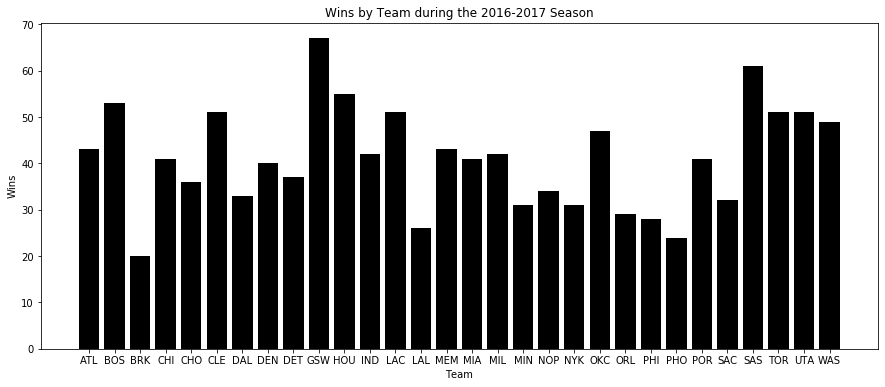

   Team  COUNT(WINorLOSS)
0   ATL                43
1   BOS                53
2   BRK                20
3   CHI                41
4   CHO                36
5   CLE                51
6   DAL                33
7   DEN                40
8   DET                37
9   GSW                67
10  HOU                55
11  IND                42
12  LAC                51
13  LAL                26
14  MEM                43
15  MIA                41
16  MIL                42
17  MIN                31
18  NOP                34
19  NYK                31
20  OKC                47
21  ORL                29
22  PHI                28
23  PHO                24
24  POR                41
25  SAC                32
26  SAS                61
27  TOR                51
28  UTA                51
29  WAS                49


In [213]:
# VISUALIZATION 3 - Total Wins by NBA team during the 2016-2017 season

nba_wins = pd.read_sql("SELECT Team, COUNT(WINorLOSS) from nba_final where WINorLOSS = 'W' GROUP BY Team", engine)

teams_nba = ['ATL', 'BOS', 'BRK', 'CHI', 'CHO', 'CLE','DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS']
team_wins = [43, 53, 20, 41, 36, 51, 33, 40, 37, 67, 55, 42, 51, 26, 43, 41, 42, 31, 34, 31, 47, 29, 28, 24, 41, 32, 61, 51, 51, 49]

plt.rcParams['figure.figsize'] = (15,6)
plt.bar(teams_nba, team_wins, color = 'black')
plt.title('Wins by Team during the 2016-2017 Season')
plt.xlabel('Team')
plt.ylabel('Wins')
plt.show()

# We can clearly see that Golden State has the most wins out of all the NBA teams, and that Brooklyn has the fewest wins of any
# team. This is confirmed by the chart below.

print(nba_wins)

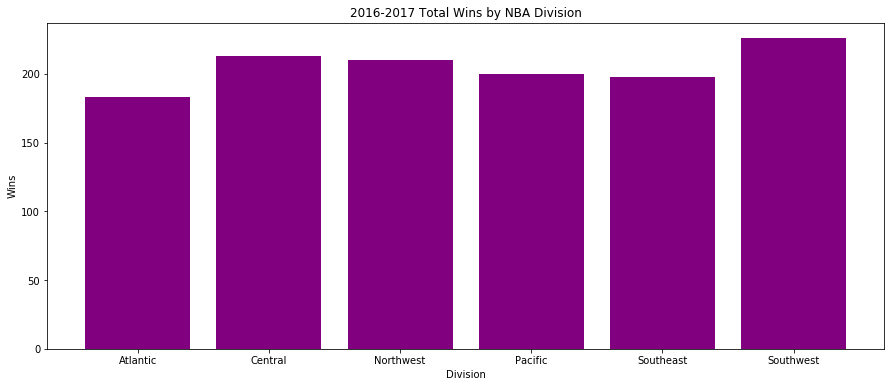

         Division  COUNT(WINorLOSS)
0         Atlanta                43
1          Boston                53
2        Brooklyn                20
3       Charlotte                36
4         Chicago                41
5       Cleveland                51
6          Dallas                33
7          Denver                40
8         Detroit                37
9    Golden State                67
10        Houston                55
11        Indiana                42
12    Los Angeles                77
13        Memphis                43
14          Miami                41
15      Milwaukee                42
16      Minnesota                31
17    New Orleans                34
18        NewYork                31
19  Oklahoma City                47
20        Orlando                29
21   Philadelphia                28
22        Phoenix                24
23       Portland                41
24     Sacramento                32
25    San Antonio                61
26        Toronto           

In [214]:
# VISUALIZATION 4 - Graph Wins by Division to determine the best Division in the NBA
# Taking wins from the CSV file and the division from the API

wins_division = pd.read_sql("SELECT Division, COUNT(WINorLOSS) from nba_final where WINorLOSS = 'W' GROUP BY Division", engine)

Division = ['Atlantic', 'Central', 'Northwest', 'Pacific', 'Southeast', 'Southwest']
Division_wins = [183, 213, 210, 200, 198, 226]

plt.title('2016-2017 Total Wins by NBA Division')
plt.bar(Division, Division_wins, color = 'purple')
plt.xlabel('Division')
plt.ylabel('Wins')
plt.show()

# Viewing this, we can see that the Southwest Division has the most wins of any division, which is confirmed by the chart below.
print(wins_division)

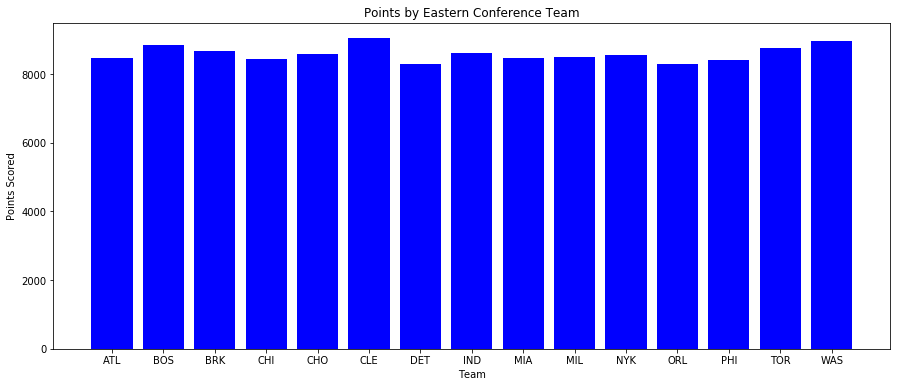

Empty DataFrame
Columns: [Team, SUM(TeamPoints)]
Index: []


In [215]:
# VISUALIZATION 5 - Graph Points Scored by Eastern Conference Team to determine the highest scoring team in the conference.
# Then do the same for the western conference.
# This will use points data and team data from the CSV file and Conference data from the API.


# EASTERN CONFERENCE
east_points = pd.read_sql("SELECT Team, SUM(TeamPoints) from nba_final where Conference = 'East' GROUP BY Team", engine)


East_teams = ['ATL', 'BOS', 'BRK', 'CHI', 'CHO', 'CLE', 'DET', 'IND', 'MIA', 'MIL', 'NYK', 'ORL', 'PHI', 'TOR', 'WAS']
East_points = [8459, 8857, 8673, 8435, 8601, 9048, 8309, 8618, 8460, 8497, 8556, 8288, 8400, 8762, 8953]


plt.title('Points by Eastern Conference Team')
plt.bar(East_teams, East_points, color = 'blue')
plt.xlabel('Team')
plt.ylabel('Points Scored')
plt.show()


# We are able to see that Cleveland scored the most points in the east and Orlando scored the fewest, which is confirmed by the
# below chart.
print(east_points)

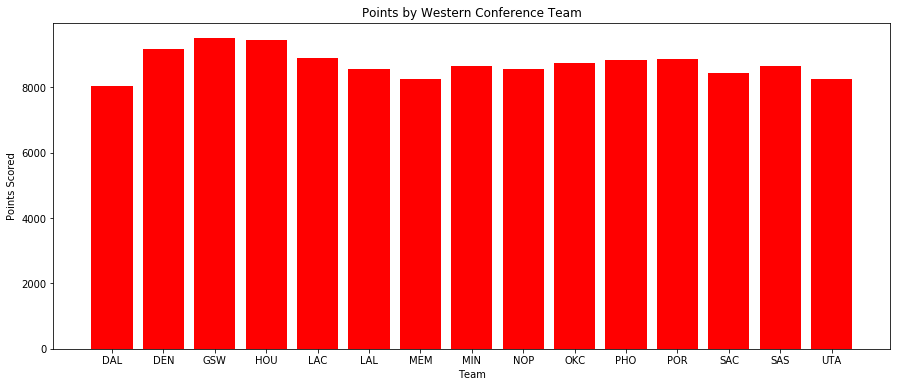

Empty DataFrame
Columns: [Team, SUM(TeamPoints)]
Index: []


In [217]:
# VISUALIZATION 5 CONTINUED
# WESTERN CONFERENCE

west_points = pd.read_sql("SELECT Team, SUM(TeamPoints) from nba_final where Conference = 'West' GROUP BY Team", engine)

West_teams = ['DAL', 'DEN', 'GSW', 'HOU', 'LAC', 'LAL', 'MEM', 'MIN', 'NOP', 'OKC', 'PHO', 'POR', 'SAC', 'SAS', 'UTA']
West_points = [8029, 9161, 9503, 9458, 8911, 8575, 8239, 8657, 8556, 8741, 8831, 8851, 8430, 8637, 8258]

plt.title('Points by Western Conference Team')
plt.bar(West_teams, West_points, color = 'red')
plt.xlabel('Team')
plt.ylabel('Points Scored')
plt.show()

# We are able to see that Golden State scored the most points in the west and Dallas scored the fewest, which is confirmed by
# the chart below.

print(west_points)